## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mousemetadata_df = pd.read_csv(mouse_metadata_path)
studyresults_df = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combineddata_df = pd.merge(mousemetadata_df, studyresults_df, how = "outer", on = "Mouse ID")

# Display the data table for preview
combineddata_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
numbermice = len(combineddata_df['Mouse ID'].unique())

numbermice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
micebyid_df = combineddata_df[combineddata_df.duplicated(subset = ['Mouse ID', 'Timepoint'])]

micebyid_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mousebyid_df = combineddata_df.loc[combineddata_df["Mouse ID"] == "g989"]

mousebyid_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

# Drop all rows with the duplicate mouse ID
# https://www.statology.org/pandas-drop-rows-with-value/
dropduplicatemouse_df = combineddata_df[combineddata_df['Mouse ID'] != 'g989']

# Reset index
dropduplicatemouse_df = dropduplicatemouse_df.reset_index()

dropduplicatemouse_df.head()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,0,k403,Ramicane,Male,21,16,0,45.000000,0
1,1,k403,Ramicane,Male,21,16,5,38.825898,0
2,2,k403,Ramicane,Male,21,16,10,35.014271,1
3,3,k403,Ramicane,Male,21,16,15,34.223992,1
4,4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
numbermice = len(dropduplicatemouse_df['Mouse ID'].unique())

numbermice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Group by drug regimen
groupsummarystats = dropduplicatemouse_df.groupby('Drug Regimen')

# Mean
meantumorvolume = groupsummarystats['Tumor Volume (mm3)'].mean()

# Median
mediantumorvolume = groupsummarystats['Tumor Volume (mm3)'].median()

# Variance(numpy doesn't work on groupby)
variancetumorvolume = groupsummarystats['Tumor Volume (mm3)'].var()

# Standard deviation
stddevtumor = groupsummarystats['Tumor Volume (mm3)'].std()

# Sem
semtumor = groupsummarystats['Tumor Volume (mm3)'].sem()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

# Summary data frame
summarytumorvolume_df = pd.DataFrame({"Mean Tumor Volume": meantumorvolume,
                                      "Median Tumor Volume": mediantumorvolume,
                                      "Tumor Volume Variance": variancetumorvolume,
                                      "Tumor Volume Standard Deviation":stddevtumor,
                                      "Tumor Volume Standard Error":semtumor})

summarytumorvolume_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
aggregationtumor_df = groupsummarystats.agg(["mean","median","var","std","sem"])["Tumor Volume (mm3)"]

# Rename columns
aggregationtumor_df = aggregationtumor_df.rename(columns = {'mean':'Mean', 'median':'Median', 
                                                            'var':'Variance', 'std':'Std. Dev.', 
                                                            'sem':'SEM'})

aggregationtumor_df

,Mean,Median,Variance,Std. Dev.,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

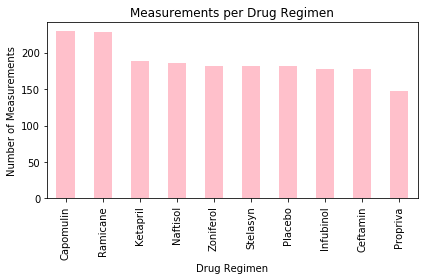

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

# Calculate the total number of measurements
numbermeasurementsregimen = groupsummarystats['Tumor Volume (mm3)'].count()

# Sort into descending order
numbermeasurementsregimensorted = numbermeasurementsregimen.sort_values(ascending = False)

# Plot using pandas
pandasbar = numbermeasurementsregimensorted.plot(kind = 'bar', facecolor = 'pink')

# Set textual properties
plt.title("Measurements per Drug Regimen")
plt.ylabel("Number of Measurements")
plt.xlabel("Drug Regimen")

# Resize plot to display labels
plt.tight_layout()

plt.show()

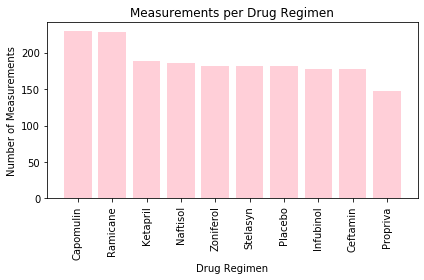

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

# https://stackoverflow.com/questions/58435657/how-to-access-column-after-pandas-groupby
# Plot using pyplot
pyplotbar = plt.bar(numbermeasurementsregimensorted.index.values, numbermeasurementsregimensorted.values,
                    facecolor = "pink", alpha = 0.75, align = "center")

# Set textual properties
plt.title("Measurements per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements")

# Format x axis headers vertically
plt.xticks(rotation = 90)

# Resize plot to display labels
plt.tight_layout()

plt.show()

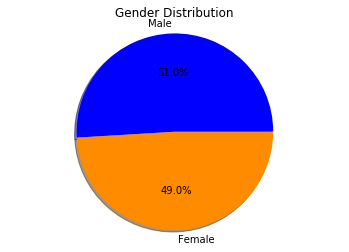

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Group by gender
groupgender = dropduplicatemouse_df.groupby('Sex')

# Calculate distribution of female versus male mice
gendercount = groupgender['Mouse ID'].count()

# Sort into descending order
gendercount = gendercount.sort_values(ascending = False)

# Plot using pandas
pandaspie = gendercount.plot(kind = 'pie', autopct = '%1.1f%%',
                             shadow = True, colors = ['blue', 'darkorange'])
# Set textual properties
plt.title('Gender Distribution')

# Remove y axis label
pandaspie.set_ylabel("")

# Ensure perfect circular shape
plt.axis("equal")

plt.show()

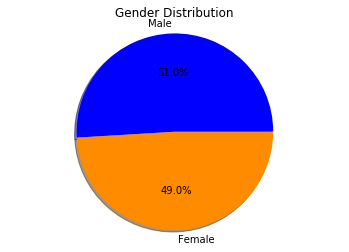

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Data frame with distribution of female versus male mice
gendercount_df = pd.DataFrame(gendercount)

# Create labels for pie chart
genders = ['Male', 'Female']

# Plot using pyplot
pyplotpie = plt.pie(gendercount_df['Mouse ID'], labels = genders, colors = ['blue', 'darkorange'],
                    autopct = "%1.1f%%", shadow = True)

# Set textual properties
plt.title('Gender Distribution')

# Ensure perfect circular shape
plt.axis("equal")

plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

# Group by 'Mouse ID'
groupmousetime = dropduplicatemouse_df.groupby('Mouse ID')

# Calculate the greatest 'Timepoint'
greatesttimepoint_df = pd.DataFrame(groupmousetime['Timepoint'].max())

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
mergedtimepoint_df = pd.merge(greatesttimepoint_df, dropduplicatemouse_df, on = ["Mouse ID", "Timepoint"])

# Delete extra index column
mergedtimepoint_df = mergedtimepoint_df.drop(columns = 'index')

mergedtimepoint_df.head(10)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
5,a401,45,Zoniferol,Female,8,25,66.794156,4
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0
8,a457,10,Ketapril,Female,11,30,49.783419,0
9,a492,45,Stelasyn,Male,20,25,60.122011,1


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
pertreatmenttumorvoldata = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# For each drug from the list of 4 drugs
for each in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumorvolumeperdrug = mergedtimepoint_df.loc[mergedtimepoint_df['Drug Regimen'] == each, 'Tumor Volume (mm3)']
    
    # Add to empty list
    pertreatmenttumorvoldata.append(tumorvolumeperdrug)
        
    # Quartiles
    quartiles = tumorvolumeperdrug.quantile([.25,.5,.75])
    
    # 25%
    lowerquartile = quartiles[0.25]
    
    # 50%
    medianquartile = quartiles[0.5]
    
    # 75%
    upperquartile = quartiles[0.75]
    
    # Inter Quartile Range
    iqr = upperquartile - lowerquartile
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerquartile - (1.5*iqr)
    upper_bound = upperquartile + (1.5*iqr)
    
    # Print relevant data
    print(f"For {each}, the lower quartile of temperatures is: {lowerquartile}")
    print(f"For {each}, the upper quartile of temperatures is: {upperquartile}")
    print(f"For {each}, the interquartile range of {each} temperatures is: {iqr}")
    print(f"For {each}, the the median of {each} temperatures is: {quartiles[0.5]} ")
    print(f"For {each}, values below {lower_bound} and above {upper_bound} could be outliers.")

For Capomulin, the lower quartile of temperatures is: 32.37735684
For Capomulin, the upper quartile of temperatures is: 40.1592203
For Capomulin, the interquartile range of Capomulin temperatures is: 7.781863460000004
For Capomulin, the the median of Capomulin temperatures is: 38.125164399999996 
For Capomulin, values below 20.70456164999999 and above 51.83201549 could be outliers.
For Ramicane, the lower quartile of temperatures is: 31.56046955
For Ramicane, the upper quartile of temperatures is: 40.65900627
For Ramicane, the interquartile range of Ramicane temperatures is: 9.098536719999998
For Ramicane, the the median of Ramicane temperatures is: 36.56165229 
For Ramicane, values below 17.912664470000003 and above 54.30681135 could be outliers.
For Infubinol, the lower quartile of temperatures is: 54.04860769
For Infubinol, the upper quartile of temperatures is: 65.52574285
For Infubinol, the interquartile range of Infubinol temperatures is: 11.477135160000003
For Infubinol, the the

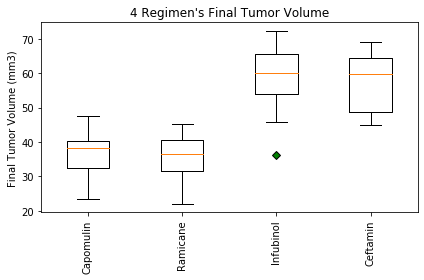

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# Define color for outlier identifier
green_diamond = dict(markerfacecolor = 'g', marker = 'D')

# Set textual properties
fig1, ax1 = plt.subplots()
plt.title("4 Regimen's Final Tumor Volume")
plt.ylabel('Final Tumor Volume (mm3)')

# Plot boxplots
ax1.boxplot(pertreatmenttumorvoldata, flierprops = green_diamond, labels = treatments)

# Format x axis headers vertically
plt.xticks(rotation = 90)

# Resize plot to display labels
plt.tight_layout()

plt.show()

## Line and Scatter Plots

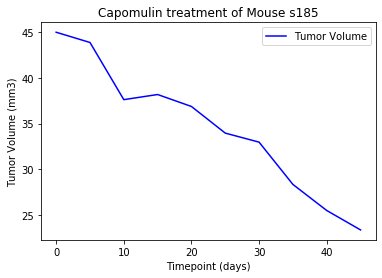

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# Filter table to show all the columns where the row has "Capomulin"
onlycapomulin = dropduplicatemouse_df.loc[dropduplicatemouse_df['Drug Regimen'] == "Capomulin", :]

# Delete extra index column
onlycapomulin = onlycapomulin.drop(columns = 'index')

# Retreive all columns for mouse s185(10 rows)
onemouse = onlycapomulin.iloc[0:10]

# Values for time point
capumolintimepoint = onemouse['Timepoint']

# Values for tumor volume
capumolintumorvolume = onemouse['Tumor Volume (mm3)']

# Plot line chart
plt.plot(capumolintimepoint, capumolintumorvolume, color = 'blue', label = "Tumor Volume")

# Set textual properties
plt.title('Capomulin treatment of Mouse s185')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')

# Place a legend on the chart in what matplotlib believes to be the "best" location
plt.legend(loc = "best")

# Print our chart to the screen
plt.show()

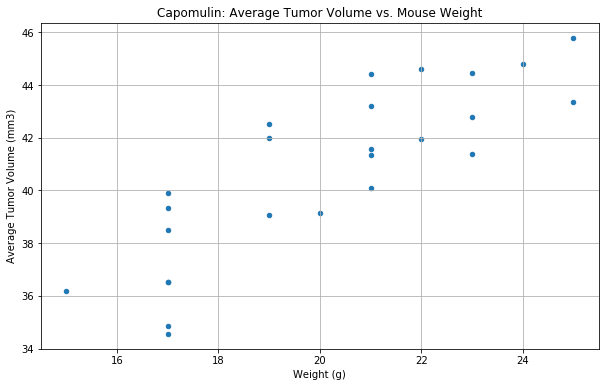

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# Group Capomulin data by Mouse ID
groupcapomulin = onlycapomulin.groupby('Mouse ID')

# Average values of all columns for each mouse
avgcapomulin_df = pd.DataFrame(groupcapomulin.mean())

# Average mouse weight per Capomulin mouse
avgmouseweight = avgcapomulin_df['Weight (g)']

# Average tumor volume per Capomulin mouse
avgtumorvolume = avgcapomulin_df['Tumor Volume (mm3)']

# Plot scatter plot, calling columns from dataframe
avgcapomulin_df.plot(kind = "scatter", x = 'Weight (g)', y = 'Tumor Volume (mm3)', grid = True, figsize = (10,6),
                 title = "Capomulin: Average Tumor Volume vs. Mouse Weight")

# Set textual properties
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()

## Correlation and Regression

The correlation coefficient is 0.842.


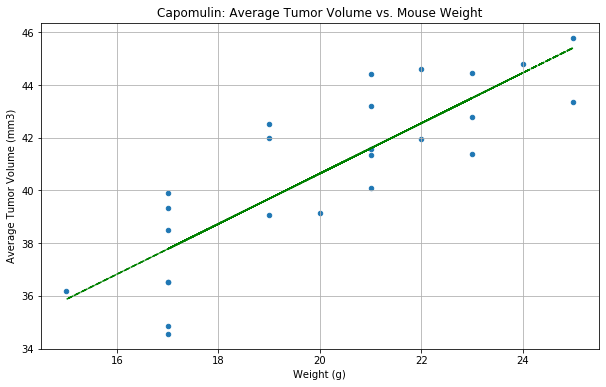

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Calculate and print correlation coefficient
print(f"The correlation coefficient is {round(st.pearsonr(avgmouseweight, avgtumorvolume)[0],3)}.")

# Perform a linear regression on mouse weight and average tumor volume
atv_slope, atv_int, atv_r, atv_p, atv_std_err = st.linregress(avgmouseweight, avgtumorvolume)

# Create equation of line to calculate predicted average tumor volume
# y = (m*x) + b
atv_fit = atv_slope * avgmouseweight + atv_int

# Plot scatter plot, calling columns from dataframe
avgcapomulin_df.plot(kind = "scatter", x = 'Weight (g)', y = 'Tumor Volume (mm3)', grid = True, figsize = (10,6),
                 title = "Capomulin: Average Tumor Volume vs. Mouse Weight")

# Plot regression line
plt.plot(avgmouseweight, atv_fit,"--", color = 'green')

# Set textual properties
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()